# K-Means aplicado ao dados do Cartola FC

## 1. Introdução

![Cartola_Logo](https://media.giphy.com/media/l41m1s2BGlUkOKvEA/giphy.gif)

Cartola FC é um Jogo eletrônico de futebol estilo Fantasy Games, ou seja, é um jogo fictício no qual as pessoas montam seus times com jogadores de futebol da vida real. Foi lançado no ano de 2005.

Criado e mantido pela Globo.com e promovido pelo canal de TV por assinatura Sportv, esse jogo de futebol virtual já conta com mais de 5 milhões de usuários cadastrados. Logo na abertura da temporada de 2016, o jogo registrou a sua melhor marca entre times escalados em uma única rodada em 12 anos de história do fantasy, incríveis 2.723.915 de usuários montaram as suas equipes para a primeira rodada do Campeonato Brasileiro de 2016.

A décima rodada de 2017 instituiu um novo recorde, onde 5.540.835 times foram escalados no jogo.

A disputa do Cartola FC é realizada utilizando todos os jogadores inscritos oficialmente na Série A do Campeonato Brasileiro e suas escalações em súmula, como acontece nos moldes dos fantasy games da NFL e da NBA americanas.

Os scouts utilizados no Cartola FC são baseados nos scouts oficiais da CBF e, caso haja algum engano foi lançado verdadeiramente em 2015 quando a globo lançou para download.

[Fonte](https://pt.wikipedia.org/wiki/Cartola_FC)


### 1.1. Dataset

O dataset pode ser acessado em: https://github.com/henriquepgomide/caRtola

**Descrição própria dos autores:**

Este repositório tem como objetivo disponibilizar todos os dados do Cartola FC desde sua criação em 2014.
Nós também tentamos prever a pontuação de cada jogador no Brasileirão.

A descrição completa dos dados pode ser encontrada em: https://github.com/henriquepgomide/caRtola/tree/master/data

### 1.2. Referências e Documentações

[Scikit Learn Kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) 

[Pandas GroupBy](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

## 2. Início e análise exploratória

In [0]:
# Configurações iniciais e todos os imports necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import numpy as np

%matplotlib inline

In [3]:
# Upload do dataset
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dados_agregados_limpos.csv to dados_agregados_limpos.csv
User uploaded file "dados_agregados_limpos.csv" with length 8508037 bytes


In [5]:
# Leitura do arquivo csv
cartola = pd.read_csv('dados_agregados_limpos.csv')

print('Shape do dataset: ',cartola.shape) # 17567 registros de jogadores no agregado 
cartola.head()

Shape do dataset:  (17567, 77)


,A,Apelido,AtletaID,CA,CV,ClubeID,DD,DP,FC,FD,...,away.score.x,dia,home.attack,home.defend,home.score.x,mes,pred.away.score,pred.home.score,risk_points,variable
0,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,2.0,0.0,...,0.0,19.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,home.team
1,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,2.0,1.0,...,2.0,27.0,0.0,0.0,2.0,4.0,0.0,0.0,1.0,away.team
2,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,2.0,0.0,...,1.0,4.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,home.team
3,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,0.0,1.0,...,1.0,10.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,home.team
4,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,5.0,0.0,...,0.0,18.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,away.team


Para a análise aqui proposta, escolheu-se trabalhar apenas com jogadores de uma mesma posição. 

Assim, seleciona-se apenas os jogadores meio campistas que participaram da rodada (True na coluna "Participou").

In [6]:
meioCampo = cartola[(cartola["Posicao"]=="mei") & (cartola["Participou"]==True)]

print("Numero de meio campistas (Ocorrência única): {}".format(meioCampo["AtletaID"].unique().shape[0])) # registros de todos os meio-campistas 

meioCampo.head()

Numero de meio campistas (Ocorrência única): 257


,A,Apelido,AtletaID,CA,CV,ClubeID,DD,DP,FC,FD,...,away.score.x,dia,home.attack,home.defend,home.score.x,mes,pred.away.score,pred.home.score,risk_points,variable
159,0.0,Michel Bastos,37607,1.0,0.0,Palmeiras,0.0,0.0,1.0,0.0,...,0.0,4.0,0.0,0.0,0.0,6.0,0.0,0.0,1.322456,home.team
160,0.0,Michel Bastos,37607,0.0,0.0,Palmeiras,0.0,0.0,0.0,1.0,...,0.0,7.0,0.0,0.0,1.0,6.0,0.0,0.0,1.475014,away.team
161,0.0,Michel Bastos,37607,1.0,0.0,Palmeiras,0.0,0.0,0.0,0.0,...,1.0,10.0,0.0,0.0,3.0,6.0,0.0,0.0,1.678491,home.team
162,0.0,Michel Bastos,37607,0.0,0.0,Palmeiras,0.0,0.0,2.0,1.0,...,0.0,1.0,0.0,0.0,1.0,7.0,0.0,0.0,1.935200,home.team
163,0.0,Michel Bastos,37607,0.0,0.0,Palmeiras,0.0,0.0,1.0,0.0,...,1.0,9.0,0.0,0.0,3.0,7.0,0.0,0.0,1.577480,away.team


Como já se tem colunas com as os atributos baseados em média, vamos fazer uma análise exploratória gŕafica ...

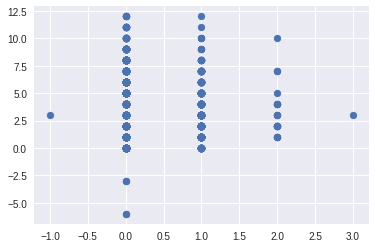

In [7]:
plt.scatter(meioCampo["A"], meioCampo["PE"])


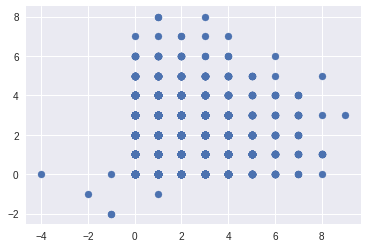

In [8]:
plt.scatter(meioCampo["RB"], meioCampo["FC"])

## 3. Implementação do K-means

Descrever aqui o objetivo da nossa análise.

Para a análise proposta acima, escolheu-se treinar o algoritmo com apenas 2 features, para possibilitar a visualização do resultado de forma gráfica.

In [0]:
# Definindo quais features serão utilizadas
# Cols1 = ['FS','PE','A','FT','FD','FF','G','I','PP','RB','FC','GC','CA','CV','SG','DD','DP','GS']
Cols1 = ['A','RB','G']

# Utilização do método groupby para agrupar as observations do dataset com base no AtletaID, 
# que é a identificação dos jogadores
cartola1 = meioCampo.groupby(['AtletaID'])[Cols1]


Explicar aqui por que precisa tirar a média.

In [0]:
X = cartola1.mean()

Text(0.5,0,'Media RB')

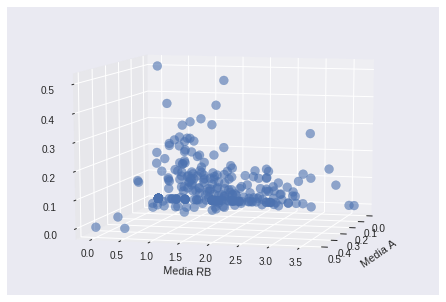

In [13]:
# Plotando os dados originais
ax = Axes3D(plt.figure())

ax.scatter(X["A"], X["RB"], X["G"], s=80, alpha=0.6)
ax.view_init(10, 15)
ax.tick_params(axis='x', pad=0.5)
ax.tick_params(axis='y', pad=0.5)
plt.xlabel("Media A")
plt.ylabel("Media RB")

In [14]:
# Aplicando o k-means para um total de 3 clusters
km = KMeans(n_clusters=3)
km = km.fit(X)
km.labels_


array([2, 2, 0, 2, 0, 1, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 1, 1, 0, 2,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 0, 2, 1,
       2, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2,
       0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0,
       0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 1,
       2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0], dtype=int32)

In [15]:
print(km.cluster_centers_)

[[0.06564235 0.40495452 0.0754464 ]
 [0.02455479 2.31000402 0.04730535]
 [0.06235044 1.23767604 0.06601375]]


Text(0.5,0,'Media RB')

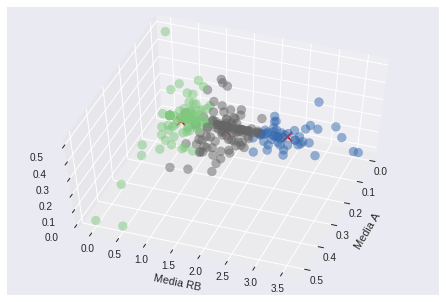

In [17]:
# Plot dos dados originais separados por cor de acordo com a classificação gerada pelo k-means
ax = Axes3D(plt.figure())

ax.scatter(X["A"], X["RB"], X['G'], c=km.labels_, cmap='Accent', s=80, alpha=0.5)
ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], km.cluster_centers_[:,2],marker='x', c='r', s=80, alpha=1)
ax.view_init(55, 20)
ax.tick_params(axis='x', pad=0.5)
ax.tick_params(axis='y', pad=0.5)
plt.xlabel("Media A")
plt.ylabel("Media RB")

  

Text(0.5,0,'Media RB')

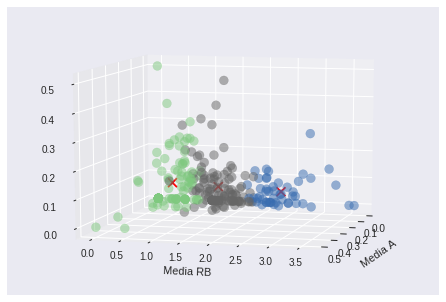

In [18]:
# Plot dos dados originais separados por cor de acordo com a classificação gerada pelo k-means
ax = Axes3D(plt.figure())

ax.scatter(X["A"], X["RB"], X['G'], c=km.labels_, cmap='Accent', s=80, alpha=0.5)
ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], km.cluster_centers_[:,2],marker='x', c='r', s=80, alpha=1)
ax.view_init(10, 15)
ax.tick_params(axis='x', pad=0.5)
ax.tick_params(axis='y', pad=0.5)
plt.xlabel("Media A")
plt.ylabel("Media RB")


## 4. Análise de Resultados

Explicar a função abaixo.

In [0]:
def group_to_Pos(pd):
  
  keys = pd
  pos = []
  for i in keys:
    
    pos.append(meioCampo[meioCampo.AtletaID==i]["Posicao"])
  
  print(pos)

In [107]:
group_to_Pos(X.index)

[159    mei
160    mei
161    mei
162    mei
163    mei
164    mei
165    mei
166    mei
167    mei
168    mei
169    mei
170    mei
171    mei
172    mei
Name: Posicao, dtype: object, 173    mei
174    mei
175    mei
176    mei
177    mei
Name: Posicao, dtype: object, 243      mei
244      mei
245      mei
246      mei
247      mei
248      mei
249      mei
250      mei
251      mei
252      mei
253      mei
254      mei
255      mei
256      mei
257      mei
258      mei
259      mei
260      mei
261      mei
262      mei
263      mei
264      mei
17495    mei
Name: Posicao, dtype: object, 534      mei
535      mei
536      mei
537      mei
538      mei
539      mei
540      mei
541      mei
542      mei
543      mei
544      mei
545      mei
546      mei
547      mei
548      mei
549      mei
550      mei
551      mei
552      mei
553      mei
554      mei
555      mei
556      mei
557      mei
558      mei
559      mei
560      mei
561      mei
562      mei
563      mei
564      me

In [59]:
cartola.AtletaID.values[0]

36540

In [58]:
cartola.AtletaID.values[0]==np.array(cartola1.groups.keys())

array([False, False, False, ..., False, False, False])